In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
tf.config.experimental.set_visible_devices([], 'GPU')

2023-08-31 14:45:16.015091: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-31 14:45:16.058328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 14:45:16.808253: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install pillow
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [4]:
# from os import walk
# mypath = '/home/dll/Documents/Aniruddha/Dataset/road/'

# filenames = next(walk(mypath), (None, None, []))[2]  # [] if no file
# filenames

In [5]:
# for i in filenames:
#     print(i)
#     print('next')

In [6]:
# import pyheif
# from PIL import Image
# import os

# input_path= '/home/dll/Documents/Aniruddha/Dataset/road/'
# output_path= '/home/dll/Documents/Aniruddha/New_Data/Train/Road/'

# def heic_to_jpg(input_path, output_path):
#     heif_file = pyheif.read(input_path)
#     image = Image.frombytes(
#         heif_file.mode, 
#         heif_file.size, 
#         heif_file.data,
#         "raw",
#         heif_file.mode,
#         heif_file.stride,
#     )
# #     print(output_path)
#     image.save(output_path, format="JPEG")
# for i in filenames:
# #     print(input_path+i)
#     output_ext = i.split('.')[0]
# #     print(output_ext+'.jpg')
#     try:
#         heic_to_jpg(input_path+i, output_path+output_ext+'.jpg')
#     except:
#         print('there is some error')

In [7]:
# Set the image dimensions and number of classes
img_width, img_height = 224, 224
num_classes = 2  # 'car' and 'no_car'

In [8]:
# Set the paths for your training, validation, and test data
train_data_dir = '/home/dll/Documents/Aniruddha/17 Aug/New Data/Train'  # Loading train Data
validation_data_dir = '/home/dll/Documents/Aniruddha/17 Aug/New Data/Validation'  # Loading Validation Data
test_data_dir = '/home/dll/Documents/Aniruddha/17 Aug/New Data/Test'  # Loading test data

In [9]:
# # Data augmentation for training images
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )


# train_datagen
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [10]:
# Rescaling for validation and test images (no data augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [11]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=10,
    class_mode='binary'
)


Found 842 images belonging to 2 classes.


In [12]:
# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=10,
    class_mode='binary'
)

Found 79 images belonging to 2 classes.


In [13]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=10,
    class_mode='binary',
    shuffle=False  # To maintain the order of images for confusion matrix
)

Found 108 images belonging to 2 classes.


In [14]:
# Print the number of classes determined by Keras
num_classes = train_generator.num_classes
print("Number of classes in Train:", num_classes)

# Print the number of classes determined by Keras
num_classes_validation = validation_generator.num_classes
print("Number of classes in validation:", num_classes_validation)

# Print the number of classes determined by Keras
num_classes_test = test_generator.num_classes
print("Number of classes in test:", num_classes_test)

Number of classes in Train: 2
Number of classes in validation: 2
Number of classes in test: 2


In [15]:
class_names = list(train_generator.class_indices.keys())
print(class_names)
print(train_generator.class_indices)

['car', 'no_car']
{'car': 0, 'no_car': 1}


In [16]:
# Subfolders for 'car' and 'no_car'
car_dir = os.path.join(train_data_dir, 'car')
no_car_dir = os.path.join(train_data_dir, 'no_car')

In [17]:
# Get a list of image filenames in each folder
car_images = [os.path.join(car_dir, filename) for filename in os.listdir(car_dir)]
no_car_images = [os.path.join(no_car_dir, filename) for filename in os.listdir(no_car_dir)]

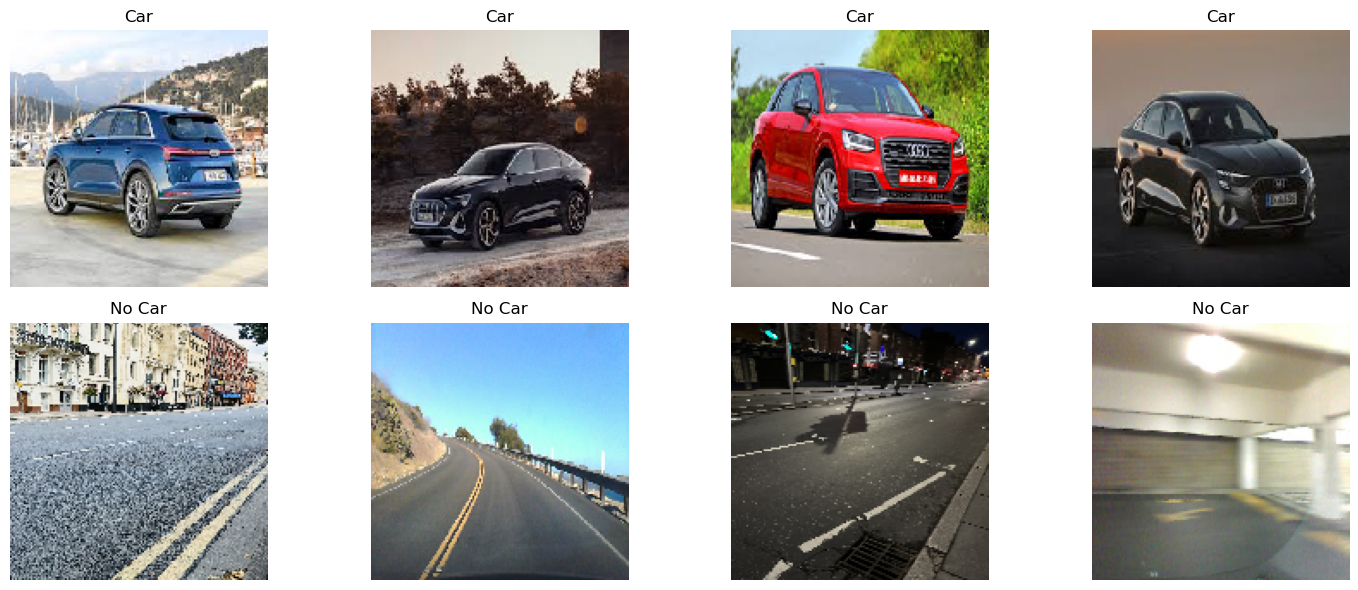

In [18]:
# Choose the number of sample images to display
num_samples_per_class = 4

# Create a subplot grid
fig, axes = plt.subplots(2, num_samples_per_class, figsize=(15, 6))

# Display sample images of 'car'
for i, img_path in enumerate(car_images[:num_samples_per_class]):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust target size if needed
    axes[0, i].imshow(img)
    axes[0, i].set_title('Car')
    axes[0, i].axis('off')

# Display sample images of 'no_car'
for i, img_path in enumerate(no_car_images[:num_samples_per_class]):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust target size if needed
    axes[1, i].imshow(img)
    axes[1, i].set_title('No Car')
    axes[1, i].axis('off')

# Adjust layout spacing and show the plot
plt.tight_layout()
plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, LeakyReLU

# Build the ResNet model
input_shape = (img_height, img_width, 3)
num_classes = 1  # For binary classification
# resnet_model = build_resnet(input_shape, num_classes)
resnet_model_load = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    input_tensor=None,
    input_shape=input_shape,
    pooling='max',
)


resnet_model = Sequential()
resnet_model.add(resnet_model_load)
resnet_model.add(Dense(num_classes, activation='sigmoid'))

resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 23536641 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [20]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model

# def residual_block(x, filters, kernel_size=3, strides=1):
#     shortcut = x
    
#     # First convolutional layer
#     x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
    
#     # Second convolutional layer
#     x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
#     x = BatchNormalization()(x)
    
#     # Skip connection
#     if strides > 1:
#         shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
#         shortcut = BatchNormalization()(shortcut)
    
#     x = tf.keras.layers.add([x, shortcut])
#     x = ReLU()(x)
#     return x

# def create_resnet(input_shape, num_classes, num_filters=64, num_blocks_per_group=[2, 2, 2, 2]):
#     inputs = Input(shape=input_shape)
    
#     # Initial convolutional layer
#     x = Conv2D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
    
#     # Residual blocks
#     for i, num_blocks in enumerate(num_blocks_per_group):
#         # First block in each group may have strides > 1
#         strides = 1 if i == 0 else 2
#         for _ in range(num_blocks):
#             x = residual_block(x, filters=num_filters, strides=strides)
#         num_filters *= 2
    
#     # Global average pooling
#     x = GlobalAveragePooling2D()(x)
    
#     # Fully connected output layer
#     outputs = Dense(num_classes, activation='softmax')(x)
    
#     model = Model(inputs, outputs)
#     return model

# # Define input shape and number of classes
# input_shape = (224, 224, 3)  # Example input shape for images
# num_classes = 1  # Example number of classes

# # Create ResNet model
# resnet_model = create_resnet(input_shape, num_classes)

# # Print model summary
# resnet_model.summary()


In [21]:
# Compile the model

optimizer = RMSprop(learning_rate=0.0001) # Example learning rate
resnet_model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])



In [22]:
# Get the current working directory
current_dir = os.getcwd()

# Specify the directory where you want to save the model checkpoint files
ResNet_save_dir = os.path.join(current_dir, '/home/dll/Documents/Aniruddha/17 Aug/New Data/Epochs/ResNet')

In [23]:
# Create the 'saved_models' directory if it doesn't exist
if not os.path.exists(ResNet_save_dir):
    os.makedirs(ResNet_save_dir)

In [24]:
# Specify the file path pattern for model checkpoint files in the 'saved_models' directory
filepath = os.path.join(ResNet_save_dir, 'model_checkpoint_{epoch:02d}.h5')

In [25]:
from keras.callbacks import ModelCheckpoint
# Create a callback to save the model and weights at the end of each epoch
model_checkpoint = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,
    save_best_only=False,
    monitor='val_accuracy',  # Choose the metric to monitor for saving the model
    mode='auto',
    save_freq='epoch'  # Save at the end of each epoch
)

In [26]:
# Train the model
epochs = 50
ResNet_history = resnet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[model_checkpoint]  # Add the ModelCheckpoint callback
)

Epoch 1/50


2023-08-31 14:45:32.518714: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f990800aec0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-31 14:45:32.518770: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-31 14:45:32.530207: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-31 14:45:32.618861: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


85/85 [==============================] - ETA: 0s - loss: 0.1063 - accuracy: 0.9715

/home/dll/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 61s 632ms/step - loss: 0.1063 - accuracy: 0.9715 - val_loss: 7.8189 - val_accuracy: 0.4937
Epoch 2/50
85/85 [==============================] - 52s 610ms/step - loss: 0.0455 - accuracy: 0.9869 - val_loss: 6.5412 - val_accuracy: 0.4937
Epoch 3/50
85/85 [==============================] - 52s 611ms/step - loss: 0.0224 - accuracy: 0.9952 - val_loss: 1.7818 - val_accuracy: 0.3544
Epoch 4/50
85/85 [==============================] - 52s 608ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.5351 - val_accuracy: 0.4810
Epoch 5/50
85/85 [==============================] - 52s 611ms/step - loss: 0.0117 - accuracy: 0.9976 - val_loss: 6.9035 - val_accuracy: 0.5063
Epoch 6/50
85/85 [==============================] - 52s 611ms/step - loss: 4.6731e-04 - accuracy: 1.0000 - val_loss: 1.8400 - val_accuracy: 0.6329
Epoch 7/50
85/85 [==============================] - 52s 617ms/step - loss: 0.0141 - accuracy: 0.9988 - val_loss: 1.6998 - val_accuracy: 0.7215
Epoch 

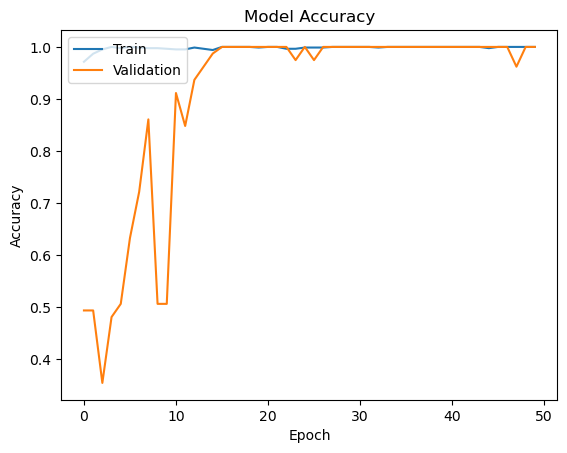

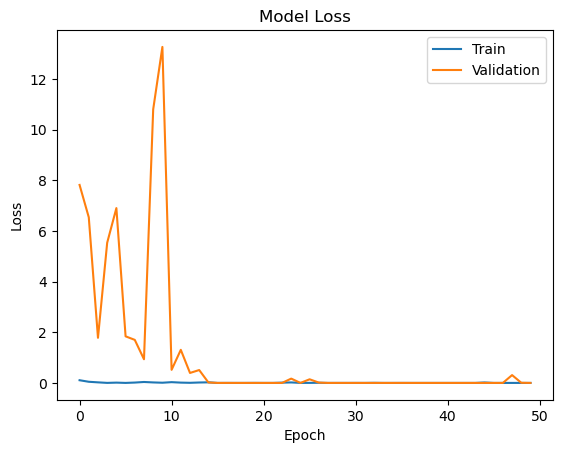

In [27]:
# Plot the training and validation accuracy
plt.plot(ResNet_history.history['accuracy'])
plt.plot(ResNet_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation loss
plt.plot(ResNet_history.history['loss'])
plt.plot(ResNet_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
# Evaluate the model on the test set
loss, accuracy = resnet_model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

11/11 [==============================] - 4s 373ms/step - loss: 0.6419 - accuracy: 0.9907
Test loss: 0.6419, Test accuracy: 0.9907


In [29]:
import os
from tensorflow.keras.models import load_model

# Choose the epoch number you want to load
selected_epoch = 10  # Replace with the desired epoch number

# Load the model from a specific epoch
model_path = os.path.join('/home/dll/Documents/Aniruddha/17 Aug/New Data/Epochs/ResNet', f'model_checkpoint_{selected_epoch:02d}.h5')
loaded_model = load_model(model_path)

# Evaluate the model on the test set
loss, accuracy = loaded_model.evaluate(test_generator)
print(f'Test loss (epoch {selected_epoch}): {loss:.4f}, Test accuracy: {accuracy:.4f}')


11/11 [==============================] - 5s 376ms/step - loss: 15.6966 - accuracy: 0.3796
Test loss (epoch 10): 15.6966, Test accuracy: 0.3796


In [30]:
# Get the true labels and predictions for the test set
Y_true = test_generator.classes
Y_pred = resnet_model.predict(test_generator)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

11/11 [==============================] - 5s 373ms/step


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate the confusion matrix and classification report
cm = confusion_matrix(Y_true, Y_pred)
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(classification_report(Y_true, Y_pred, target_names=['car', 'no_car']))

Confusion Matrix:
[[67  1]
 [ 0 40]]

Classification Report:
              precision    recall  f1-score   support

         car       1.00      0.99      0.99        68
      no_car       0.98      1.00      0.99        40

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



11/11 [==============================] - 4s 372ms/step


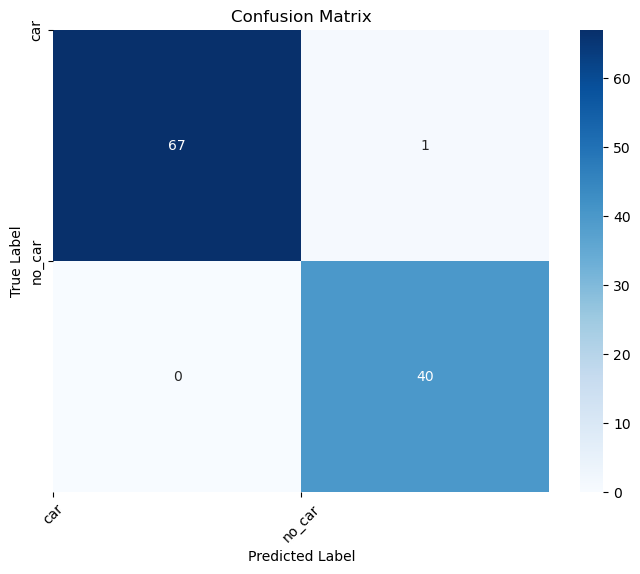

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have the model predictions and true labels for the test dataset
# Replace 'test_predictions' and 'true_labels' with your actual variables.
test_predictions = resnet_model.predict(test_generator)
true_labels = test_generator.labels

# Get the class labels from the test iterator
class_labels = list(test_generator.class_indices.keys())

# Convert the predicted probabilities to class labels (assuming binary classification)
predicted_labels = (test_predictions > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels to the plot
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

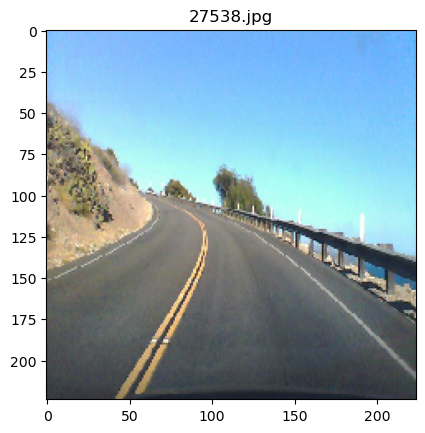

1/1 [==============================] - 0s 73ms/step
there is no car


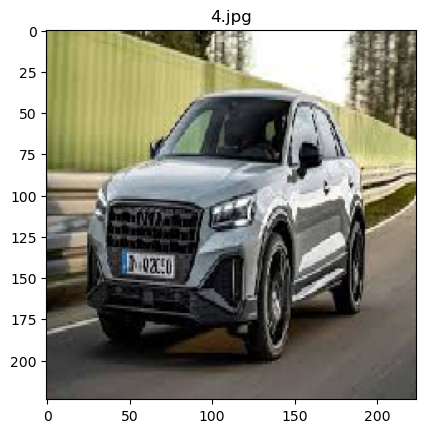

1/1 [==============================] - 0s 79ms/step
there is no car


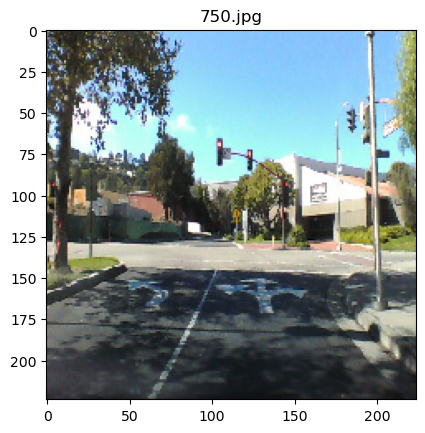

1/1 [==============================] - 0s 90ms/step
there is no car


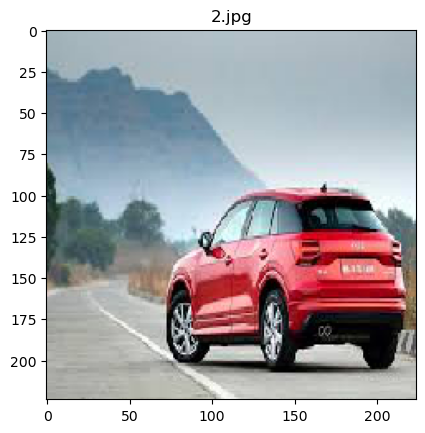

1/1 [==============================] - 0s 107ms/step
there is no car


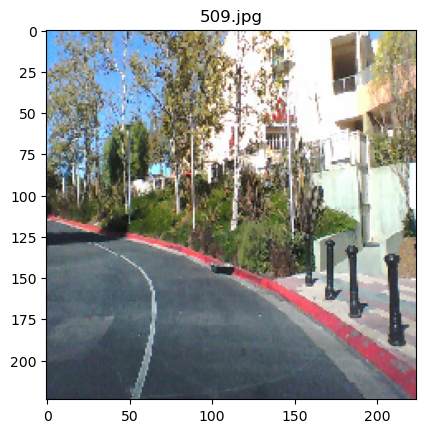

1/1 [==============================] - 0s 65ms/step
there is no car


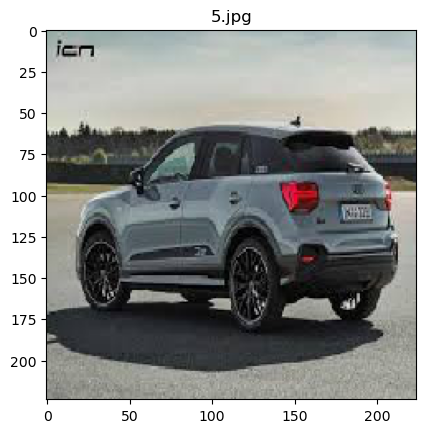

1/1 [==============================] - 0s 70ms/step
there is no car


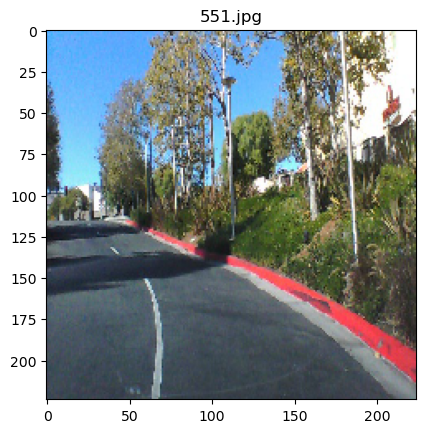

1/1 [==============================] - 0s 64ms/step
there is no car


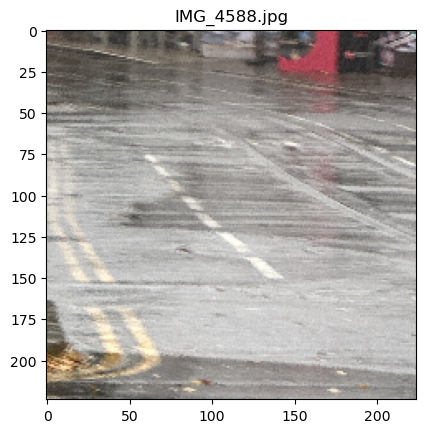

1/1 [==============================] - 0s 63ms/step
there is no car


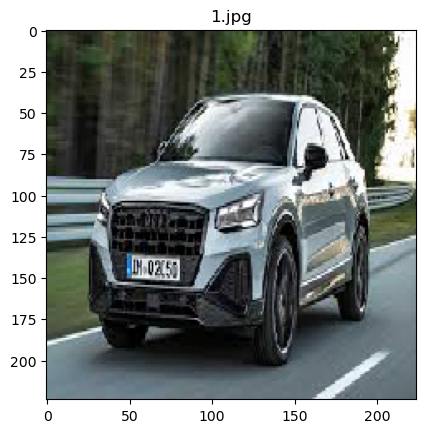

1/1 [==============================] - 0s 116ms/step
there is no car


In [48]:
dir_path = '/home/dll/Documents/Aniruddha/17 Aug/New Data/Testing_images'

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as tf_image

for i in os.listdir(dir_path):
    img = tf_image.load_img(os.path.join(dir_path, i), target_size=(img_width, img_height))
#     img = tf_image.load_img(os.path.join(dir_path, i), target_size=(50, 50))
    plt.imshow(img)
    plt.title(i)
    plt.show()

    X = tf_image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])


# for i in os.listdir(dir_path):
#     img = tf_image.load_img(os.path.join(dir_path, i), target_size=(150, 150))
#     plt.imshow(img)
#     plt.title(i)
#     plt.show()
    
# for i in os.listdir(dir_path):
#     img = image.load_img(dir_path + '//' + i, target_size = (150, 150))
#     plt.imshow(img)
#     plt.show()
    
#     X = image.img_to_array(img)
#     X = np.expand_dims(X, axis = 0)
#     images = np.vstack([X])
    val = resnet_model.predict(images)
    if val == 0:
        print("there is a car")
    else:
        print("there is no car")

In [34]:
# Save the trained model
resnet_model.save('/home/dll/Documents/Aniruddha/17 Aug/New Data/Models/ResNet.h5')

/home/dll/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
from tensorflow.keras.models import load_model, Model
#loading the saved model
ResNetmodel_path = '/home/dll/Documents/Aniruddha/17 Aug/New Data/Models/ResNet.h5'
# ResNet = load_model(model_path)
resnet_model = load_model(ResNetmodel_path)

In [36]:
# Choose the target layer for visualization
target_layer_name='dense' #choose an intermediate convolutional layer

In [65]:
from keras.applications.vgg16 import preprocess_input
# Load and preprocess an image
image_path = '/home/dll/Documents/Aniruddha/17 Aug/New Data/Testing_images/1.jpg'
img = tf_image.load_img(image_path, target_size=(img_width, img_height))
x = tf_image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [66]:
# Get the class index for 'no_car' class (0 or 1 depending on your setup)
class_index = 1  # Assuming 'no_car' is class 1

In [67]:
# # grad_model = Model(inputs=resnet_model.input, outputs=(resnet_model.get_layer(target_layer_name).output, resnet_model.output))
# # Create a gradient model using the chosen intermediate layer
grad_model = Model(inputs=resnet_model.input,
                   outputs=(resnet_model.get_layer(name=target_layer_name).output, resnet_model.output))

with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(x)
    loss = predictions[:, 0]  # Assuming the first column represents the 'car' class

grads = tape.gradient(loss, conv_output)[0]
heatmap = np.mean(grads, axis=0)

In [68]:
# Normalize the heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [69]:
# Convert the PIL Image to a numpy array and get dimensions
img_array = tf_image.img_to_array(img)
img_height, img_width, _ = img_array.shape

In [70]:
# Resize the heatmap to match the image size
heatmap = cv2.resize(heatmap, (img_width, img_height))


In [71]:
# Apply heatmap to the original image
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cv2.cvtColor(np.uint8(x[0]), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)


# Save the results
cv2.imwrite('/home/dll/Documents/Aniruddha/17 Aug/New Data/Check/original_image.jpg', np.uint8(x[0]))
cv2.imwrite('/home/dll/Documents/Aniruddha/17 Aug/New Data/Check/grad_cam_result.jpg', superimposed_img)


True

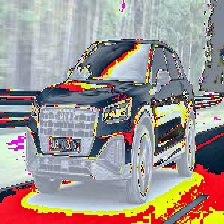

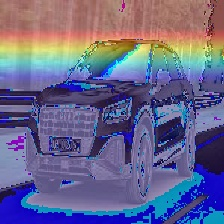

In [72]:
from IPython.display import Image, display

# Display the original image
display(Image(filename='/home/dll/Documents/Aniruddha/17 Aug/New Data/Check/original_image.jpg'))

# Display the Grad-CAM result
display(Image(filename='/home/dll/Documents/Aniruddha/17 Aug/New Data/Check/grad_cam_result.jpg'))